<a href="https://colab.research.google.com/github/aleksaveger-bot/AlexaVegera/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22dop_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4_%D1%83%D0%BA%D0%B0%D0%B7_%D0%BC%D0%BE%D0%B4%D1%83%D0%BB%D1%8F_%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Для формирования ответа к модулю**

---

**Тема: Машинное обучение**  


In [ ]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

# Загрузка данных

Загружаем датасет, подготовленный на предыдущих этапах обучения.

In [ ]:
# providing raw url to download csv from github
csv_url = 'https://raw.githubusercontent.com/AI-is-out-there/2025-biomed-upskill/refs/heads/main/datasets/heart3.csv'

raw_table_data = pd.read_csv(csv_url, header = 0)
raw_table_data.head(3)

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
0,0,18.0,1,0,6,0.97,0,4.0,0,0.52,...,10,0,20.0,3,25.1,0,799.035538,136.025100,0,-3
1,0,90.0,0,1,4,0.74,0,8.6,0,2.73,...,12,0,0.0,5,35.2,0,799.078379,224.056407,1,-7
2,0,17.0,0,0,7,1.57,0,5.2,0,1.02,...,11,0,0.0,5,19.0,0,799.055423,224.035858,0,-3


In [ ]:
#смотрим размерность датасета
table_data = raw_table_data
raw_table_data.shape

(949, 35)

##1.ML-классификация: модель GaussianNaiveBayes

> контрольный результат confusion matrix: [XX XX XX XX] (написать в таком формате, например, [21 23 45 99])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# set the classification index of table
clf_index = 33

# classification variable
y1 = table_data.iloc[:, clf_index]
# input variable
X1 = table_data.drop(table_data.columns[[clf_index]], axis=1).iloc[:,:]

y1 = pd.Series(LabelEncoder().fit_transform(y1))
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values,
                                                        y1.values,
                                                        test_size=0.2,
                                                        random_state=37,
                                                        stratify=y1.values)

In [ ]:
sk_nb_clf = GaussianNB(var_smoothing=1e-03)
sk_nb_clf.fit(X1_train, y1_train)
sk_nb_clf_pred_res = sk_nb_clf.predict(X1_test)
sk_nb_clf_accuracy = accuracy_score(y1_test, sk_nb_clf_pred_res)
y_pred=sk_nb_clf.predict(X1_test)


              precision    recall  f1-score   support

        True       0.82      0.91      0.86        86
       False       0.92      0.84      0.87       104

    accuracy                           0.87       190
   macro avg       0.87      0.87      0.87       190
weighted avg       0.87      0.87      0.87       190



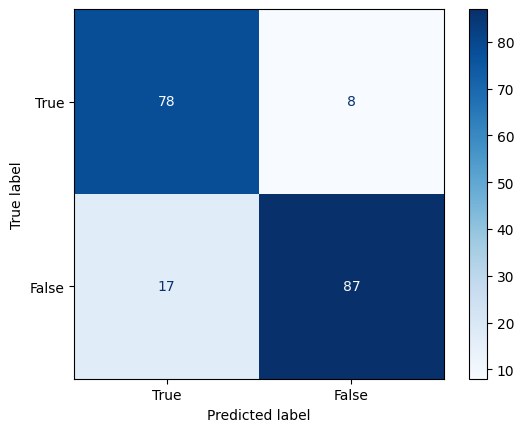

In [ ]:
target_names = ['True', 'False']
labels_names = [0,1]
print(classification_report(y1_test, y_pred,labels=labels_names, target_names=target_names))
cm = confusion_matrix(y1_test, y_pred,labels=labels_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.show()

In [ ]:
cm

##2. PCA - - principal component analysis


> контрольный результат explained_variance_ratio первых двух главных векторов: Х.ХХ Х.ХХ (написать в таком формате, например, 0.81 0.11)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
table_data = raw_table_data
table_data_pca = table_data
table_data_pca = table_data_pca.drop('ССЗ', axis = 1)
table_data_pca.columns

Index(['Бронхиальная астма', 'Возраст алког', 'Работа', 'Переломы',
       'Время пробуждения', 'ЛПВП', 'Выход на пенсию', 'Холестерин',
       'Артериальная гипертония', 'Триглицериды', 'Гепатит', 'Сахарный диабет',
       'Пол', 'Спорт, клубы', 'Семья', 'Частота пасс кур', 'Возраст курения',
       'Онкология', 'Травмы за год', 'Регулярный прием лекарственных средств',
       'Национальность', 'Алкоголь', 'Глюкоза плазмы натощак',
       'Абдоминальное ожирение, см', 'Сон после обеда', 'Время засыпания',
       'Хроническое заболевание легких', 'Сигарет в день', 'Образование',
       'Индекс массы тела, кг/м^2', 'Прекращение работы по болезни', 'Религия',
       'Профессия', 'Продолжительность сна'],
      dtype='object')

In [ ]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaled_data = StandardScaler().fit(table_data_pca).transform(table_data_pca)

pca = PCA(n_components = 2).fit(scaled_data) #количество компонет

#pca = PCA(n_components = 0.7).fit(scaled_data) #значение дисперсии, которое определит необходимое количество компонент

x_pca = pca.transform(scaled_data)
print(table_data.shape, x_pca.shape)

(949, 35) (949, 2)


In [ ]:
percent = pca.explained_variance_ratio_
print(percent.round(2))

##3. Валидация данных и оценка модели. Отбор признаков.


> контрольный результат: Выполнение валидации с использованием `******` . Для оценки модели использованы метрики  `******`. Отбор признаков методом `******`.Модель `******` достигла F1= `******` на тестовой выборке.



In [ ]:
X = raw_table_data.drop(['ССЗ'], axis=1)
y = raw_table_data['ССЗ'].values
raw_table_data_columns = X.columns


In [ ]:
#
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Отбор признаков: SelectKBest с f_classif, k = 10 (можно подобрать, но для примера — 10)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

model = LogisticRegression(C=0.0001, penalty='l2',solver='liblinear',class_weight=None,random_state=42, max_iter=1000)

# Кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1_scores = cross_val_score(model, X_train_selected, y_train, cv=cv, scoring='f1')

# Отбор признаков: SelectKBest с f_classif, k = 10 (можно подобрать, но для примера — 10)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
# Метрики на тестовой выборке
f1_test = f1_score(y_test, y_pred)
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test = recall_score(y_test, y_pred)

validation_method = "StratifiedKFold (5 фолдов)"
metrics_used = "accuracy, precision, recall, F1-score"
feature_selection_method = "SelectKBest (k=10, f_classif)"
model_name = "LogisticRegression"
f1_value = f"{f1_test:.3f}"

result_text = (
    f"Выполнение валидации с использованием {validation_method}.\n"
    f"Для оценки модели использованы метрики {metrics_used}. \n"
    f"Отбор признаков методом {feature_selection_method}. \n"
    f"Модель {model_name} достигла F1= {f1_value} на тестовой выборке."
)

print(result_text)

Выполнение валидации с использованием StratifiedKFold (5 фолдов).
Для оценки модели использованы метрики accuracy, precision, recall, F1-score. 
Отбор признаков методом SelectKBest (k=10, f_classif). 
Модель LogisticRegression достигла F1= 0.985 на тестовой выборке.


##4. Оптимизация гиперпараметров.


> контрольный результат: Проведена оптимизация гиперпараметров с использованием `******` с кросс-валидацией  `******`. Целевой метрикой была `******`. Найдены оптимальные гиперпараметры `******`.Модель показала улучшение качества `******`.

*Для выполнения оптимизации гиперпараметров воспользуемся уже подготовленными данными из предыдущего шага (масштабированными и с отобранными признаками)*

In [ ]:
#ДО оптимизации (ещё раз)
f1_before = f1_score(y_test, model.predict(X_test_selected))

# Оптимизация гиперпараметров
param_grid = {'C': [0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2'],'solver': ['liblinear', 'saga']}

grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=1000),param_grid=param_grid,
    scoring='f1',cv=cv, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

#ПОСЛЕ оптимизации
best_model = grid_search.best_estimator_
f1_after = f1_score(y_test, best_model.predict(X_test_selected))

optimization_method = "GridSearchCV"
cv_description = "StratifiedKFold (5 фолдов)"
target_metric = "F1-score"
best_params = grid_search.best_params_
improvement = f"с {f1_before:.3f} до {f1_after:.3f}"

result_message = (f"Проведена оптимизация гиперпараметров с использованием `{optimization_method}`\n"
                  f"с кросс-валидацией `{cv_description}`. Целевой метрикой была `{target_metric}`.\n"
                  f"Найдены оптимальные гиперпараметры `{best_params}`. Модель показала улучшение качества `{improvement}`.")
print(result_message)

Проведена оптимизация гиперпараметров с использованием `GridSearchCV`
с кросс-валидацией `StratifiedKFold (5 фолдов)`. Целевой метрикой была `F1-score`.
Найдены оптимальные гиперпараметры `{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}`. Модель показала улучшение качества `с 0.985 до 0.990`.
